###  Linear SVM Classification

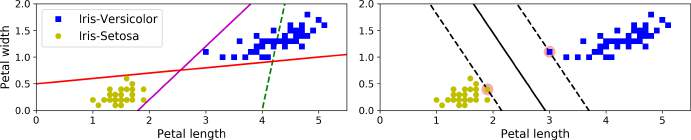




- The solid line in the plot on the right represents the decision boundary of an SVM classifier; this line not only seperates the two classes but also stays as far away from the closest training instances as possible. 



- You can think of SVM classifier as fitting the widest possible street between the classes ,this is *large margin classification*

- adding more training instances "off the street" will not affect the decision boundary at all: it is fully determined(or "supported") by the instnces located on the edge of the street. These instances are called the *support vectors*

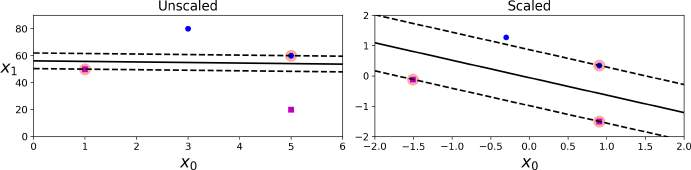

SVMs are sensitive to the feature scales,on the left plot , the vertical scale is much larger than the horizontal scale, so the widest possible street is close to horizontal. After feature scaling the decision boundary looks much better (right)

### Soft Margin Classification

If we strictly impose that all instance be off the street and on the right side, this is *hard margin classification*. But,

- It only works if the data is linearly seperable, and


- It is quite sensitive to outliers

To avoid these issues it is preferable to use a more flexible model. The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations(i.e., instances that end up in the middle of the street or even on the wrong side) , this is *soft margin classification*

In [1]:
# training SVM

import numpy as np 
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:,(2,3)] #petal length , petal width
y = (iris['target']==2).astype(np.float64) #iris-virginica
svm_clf = Pipeline([('scaler', StandardScaler()), ('linear_svc', LinearSVC(C=1,loss='hinge'))])
"""
C hyperparameter find  a good balance between 
keeping street as large as possible and limiting
the margin violations(soft margin classification).
a smaller C value leads to a wider street but more 
margin violations.Higer C value leads few margin
violations but ends up with a smaller marigin.
If the SVM model is overfitting , it can be
regularized by reducing C
"""

svm_clf.fit(X,y)
svm_clf.predict([[1,9.9]])

array([1.])

Unlike Logistic Regression classifiers, SVM classifiers do not output probabilites for each class

###  Nonlinear SVM Classification

One approach to handling nonlinear datasets is to  add  more features, such as polynomial features; in some cases this can result in a linearly seperable dataset 

In [2]:
# implementing Nonlinear SVM using polynomial features
"""
Testing this on the moons dataset: this is a toy dataset
for binary classification in which each the data 
points are shaped as two interleaving half circles
"""

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

moon = make_moons()
X = moon[0]
y = moon[1]
polynomial_svm_clf = Pipeline([('poly_features', PolynomialFeatures(degree=3)),('scaler', StandardScaler()),('svm_clf', LinearSVC(C=10,loss='hinge'))])
polynomial_svm_clf.fit(X,y)
polynomial_svm_clf.predict([[-0.69, 0.5]])

/home/shinu/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([1])

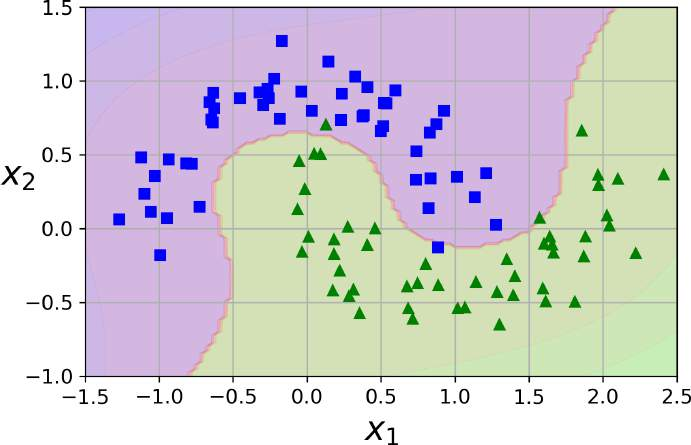

### Polynomial Kernel

When using   polynomial features , at a low polynomial degree it cannot dealwith very complex datasets, and with a high polynomial degree it creates a huge number of features, making the model slow.


But by using  mathematic trick called $kernel trick$, it is possible to get the same result as if you added many polynomial features, even with a high degree polynomial, without having to add them. So there is no combinatorial explosion of the number of features since you don't actually add any features.

In [3]:
# implementing kernel trick
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([('scaler',StandardScaler()),('svm_clf',SVC(kernel='poly', degree=3, coef0=1, C=5))])
"""
The hyperparameter coef0 controls
how much the model is influenced by high 
degree polynomials versus low-degree 
polynomials
"""
poly_kernel_svm_clf.fit(X,y)
poly_kernel_svm_clf.predict([[1.5,-0.5]])

array([1])

###  Adding Similarity Features

Another technique to tackle nonlinear  problems is to add features computed using a *similarity function* that measures how much each instance resembles a particular landmark.For example, let's take the one-dimensional dataset and add two landmarks to it at $x_1 = -2$ and $x_1 = 1$. Next let's define the similarity function to be the *Gaussian Radial Basis Function(RBF)* with $\gamma= 0.3$ 

$Gaussian Radial Basis$

$\phi_\gamma(x,l) = exp\left(-\gamma ||x-l||^2\right)$



It is bell-shaped function varying from 0 (very far away from the landmark) to 1 (at the landmark). Now we can compute the new features . For example, let's look at the instance $x_1 = -1$: it is located at a distance of 1 from the first landmark and 2 from the second landmark. Therefore its new features are $x_2 = exp\left(-0.3 \times 1^2 \right) = 0.74$ and $x_3 = exp(-0.3 \times 2^2)= 0.30$
 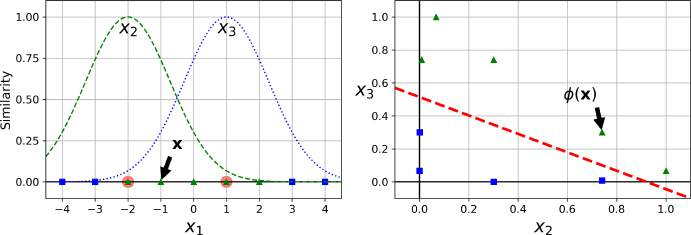

The plot on the right of the figure shows the trnsformd dataset(dropping the original features). As seen on the image it is now linearly seperable. 

 
The simplest aproach to select a landmarak is to create a landmark at the location of each and every instance in the dataset. This creates many dimensions and thus increases the chances that the  transformed training set will be linearly seperable. The downside is that a training set with $m$ instances and $n$ features gets transformed into a training set with $m$ instances and $m$ features. If the training set is very large, you end up with an equally large number of features.

###  Gaussian RBF Kernel

Just like the polynomial features method , the similarity feature method can be useful with any ML algorithm, but it may be computationally expensive to compute all the additional features,especially on large training sets. However once again the kernel trick does its SVM magic(think of some kernel from the army doing some magic with his troops and won the war with a small troop): it makes it possible to obtain a  similar result as if you had added many similarity features, without actually having to add them

In [4]:
# trying Gaussian RBF kernel using the svc class:

rbf_kernel_svm_clf = Pipeline([('scaler', StandardScaler()),('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))])
rbf_kernel_svm_clf.fit(X, y)
rbf_kernel_svm_clf.predict([[-0.5,0]])

array([0])

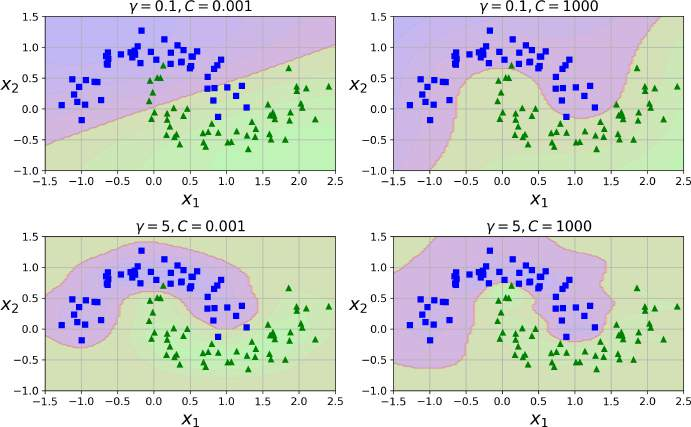

Models trained with different values of hyperparameter $\gamma$ and C. Increasing gamma makes the bell-shape curve narrower , and as a result each instance's range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances . Conversely, a small gamma value makes the bell-shped curve wider , so instances have a larger range of  influence, and the decision boundary ends up smoother. So $\gamma$ acts like a regularization hyperparameter: if the model is overfitting , reduce $\gamma$,increase if underfitting

###  SVM Regression

SVM algorithms are versatile: not only does it support linear and nonlinear classfication, but it also supports linear and nonlinear regression. The trick is to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting margin violation, SVM Regression tries to fit as many instances as possible on the street while limiting margin violations(i.e., instance off the street). The width of the street is controlled by a hyperparameter $\epsilon$ 

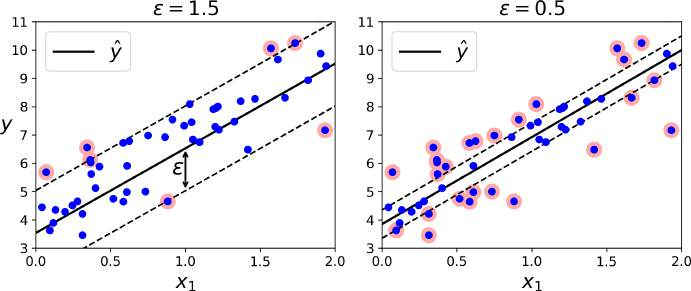


Addding more training instances within the margin does not affect the model's predictions; thus the model is said to be $\epsilon-insensitive$

In [5]:
# trying SVM regression using LinearSVR from sklearn

from sklearn.svm import LinearSVR

"""
LinearSVR scales linearly with the size of 
the training set
"""

X =  np.random.randn(100, 1)
y = 16 + 3*X + np.random.randn(100,1)
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y.ravel())
svm_reg.predict([[1]])
svm_reg.coef_
svm_reg.intercept_


array([15.16428484])

To tackle Non linear Regression task, you can use kernalise SVM models

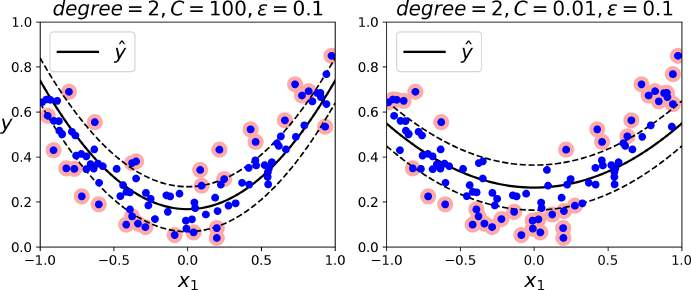


SVM Regression on a random quadratic training set , using a $2^{nd}$ degree polynomial kernel. There is little regularization on the left (large C value), and much more regularization on the right (small C value)

In [6]:
# trying non linear or a quadratic model in SVR class

from sklearn.svm import SVR

"""
The SVR class gets much too slow when the 
training set grows large
"""

x =  np.random.randn(100,1)
y = 8 + 5 *(x **2) + np.random.randn(100,1)

svm_poly_reg = SVR(kernel="poly", degree=2, C=100,epsilon=0.1)
svm_poly_reg.fit(x,y.ravel())
svm_poly_reg.predict([[2]])

array([28.05344447])

###  How SVM Works?

###  Decision Function and Predictions

The linear SVM classifier model predicts the class of a new instance **x** by simply  computing the decision function $W^T X + b = w_1 x_1 + ....+ w_n x_n$

Prediction:

$\hat y = \begin{cases} 0  &if & W^TX + b <0
\\ 1 & if & W^TX + b \ge 0\end{cases}$

### Training Objective

Consider the slope of the decision function:it is equal to the norm of the weight vector, ||**W**||. If we divide this slope by 2, the points where the decision function is equal to $\pm 1$ are going to be twice as far away from the decision boundary . In other words, dividing the slope  by 2 will multiply the margin by 2. The smaller the  weight vector **w** the larger the margin.So we want to minimize $||W||$ to get a large a margin. But,if we also want to avoid any margin violation(hard margin), then we need the decision function to be greater than 1 for all positive instances , and lower than -1 for negative instances. If we define $t^{(i)} = -1$ for negative instances and $t^{(i)} = 1$ for positive instances, then, $t^{(i)}\left(W^T X^{(i)} + b\right)\ge 1$ for all instances.
Therefore the hard margin linear SVM classifier object can be expressed as the constrained optimization problem

*Hard margin linear SVM classifier objective*


$\underset{w,b}{\operatorname{minimize}}        \frac{1}{2}W^TW$
(Taking $W^TW$ is equilant to $W.W$ or $||W||^2$ which is differentiable )


subject to   


$t^{(i)} \left(W^TX^{(i)} + b\right)\ge 1$



To get the soft margin objective , we need a slack variable $\zeta^{(i)} \ge 0$ for each instance: $\zeta^{(i)}$ measures how much the $i^{th}$ instance is allowed to violate the margin. We now have two conflicting violations: making the slack variables as small as possible to reduce margin violations, and making $\frac {1}{2}W^TW$ as small as possible to increase the margin. This is where C hyperparameter comes in , which allows us to define the tradeoff between these two objectives. This gives the constrained optimization problem

*Soft margin linear SVM classifier objective*

 
 
 $\underset{w, b, \zeta}{\operatorname{minimize}}$         $\frac{1}{2}W^TW + C \sum_{i = 1}^m \zeta^{(i)}$
 
 
 subject to     $t^{(i)}\left( W^TX^{(i)} + b \right) \ge 1 - \zeta{(i)}$ and $\zeta^{(i)} \ge 0$

### Quadratic Programming

The hard margin and soft margin problems are both convex quadratic optimization problems with linear constraints. Such problems are **Quadratic Programming** problems . The general problem formulation is 


$\underset{p}{\operatorname{Minimize}}  \frac {1}{2}p^THp + f^Tp$

subject to $Ap \le b$

where :

$\begin{cases}p & \text{is an } n_p \text{ -dimensional vector } (n_p = \text{ number of parameters})\\ H & \text{ is an } n_p \times n_p \text{ matrix,} \\ f & \text{ is an  } n_p\text{- dimensional vector ,}\\ A & \text { is an } n_c \times n_p \text { matrix }(n_c =\text { number of constraints})\\b & \text{ is an }n_c \text{-dimensional vector.} \end{cases}$

The expression $Ap\le b$ defines $n_c$ constraints:$p^Ta^{(i)} \le b^{(i)} \text{ for } i = 1,2,...,n_c$ where $a^{(i)}$ is the vector containing the elements of the $i ^{(th)}$ row of $A$ and $b^{(i)}$ is the $i^{(th)}$ elements of $b$

if you set the QP parameters in the following way, you get the hard margin linear SVM classifier objective:

- $n_p = n + 1,\text{ where }n\text{ is the number of features (the +1 is for the bias term. ) }$


- $n_c = m,\text{ where }m \text{ is the number of training instances }$


- $H \text{ is the }n_p\times n_p\text{ identity matrix,except with a zero in the top-left cell ( to ignore the bias term )}$



- $f=0, \text{ an }n_p\times n_p \text{-dimensional zero vector }$



- $b = -1,\text{ an }n_c\text{-dimensional vector full of } -1s$



- $a^{(i)}=-t^{(i)}\dot{X}^{(i)}\text{, where  }\dot{X}^{(i)} \text{ is equal to } X^{(i)} \text{ with an extra bias feature } \dot{X}_0 = 1 $


So one way to train a hard margin linear SVM classifier is just to use an QP solver by passing the preceding parameters. The resulting vector **P** will contain the bias term $b = p_0$ and the feature weights $w_i = p_i \text{ for } i = 1,2,...,n$

###  The Dual Problem 

Given a constrained optimization problem,Known as the *primal problem,* it is possible to express a different but closely related problem , called its *dual problem*. The SVM problem is under the condition that the solution to the *dual problem*  is same as the solution to the *primal problem*  

*Dual form of the linear SVM objective*

$\underset{\lambda}{\operatorname{minimize}} \frac{1}{2} \sum_{i = 1}^m \sum_{ j = 1}^m \lambda^{(i)}\lambda^{(j)} t^{(i)} t^{(j)} X^{(i)^T}X^{(j)}  -  \sum_{i = 1}^m\lambda^{(i)}$

subject to  $\lambda^{(i)} \ge 0 \text{ for } i = 1,2, ..... m$

Once you find the vector $\hat \lambda$ that minimizes this equation (using a QP solver), you can compute $\hat w \text{ and  }\hat b$ that minimizes the primal problem by using


$\hat w = \sum_{ i = 1}^m \hat \lambda ^{ (i)} t^{(i)} X^{(i)}  \text{ where }\lambda^{(i)} > 0$

$\hat b = \frac{1}{n_s}\sum_{ i = 1}^m \left(t ^{(i)} - \hat W^TX^{ (i) }\right) $

The dual problem is faster to solve than the primal when the number of training instances is smaller than the number of features .